In [2]:
from lib.train_AI_lib import *

In [3]:
setDirectory("..")  # Setting current directory to root of repo

Current Directory: /content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project/model
New Directory: /content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project


Epoch 0 | Time Taken: 21.76s | Train rootMSE: 47.7959213257, Train loss: 2284.4499511719 | Validation rootMSE: 49.1076622009, Validation loss: 2411.5625000000
Epoch 1 | Time Taken: 21.86s | Train rootMSE: 44.4683494568, Train loss: 1977.4340820312 | Validation rootMSE: 33.4654617310, Validation loss: 1119.9370117188
Epoch 2 | Time Taken: 12.81s | Train rootMSE: 23.7476196289, Train loss: 563.9494628906 | Validation rootMSE: 23.0142955780, Validation loss: 529.6578369141
Epoch 3 | Time Taken: 13.55s | Train rootMSE: 21.6696414948, Train loss: 469.5733642578 | Validation rootMSE: 22.3787155151, Validation loss: 500.8068847656
Epoch 4 | Time Taken: 14.65s | Train rootMSE: 21.1324253082, Train loss: 446.5794372559 | Validation rootMSE: 21.0223255157, Validation loss: 441.9382019043
Epoch 5 | Time Taken: 13.08s | Train rootMSE: 20.1344566345, Train loss: 405.3963317871 | Validation rootMSE: 20.4359207153, Validation loss: 417.6268920898
Epoch 6 | Time Taken: 12.80s | Train rootMSE: 18.74328

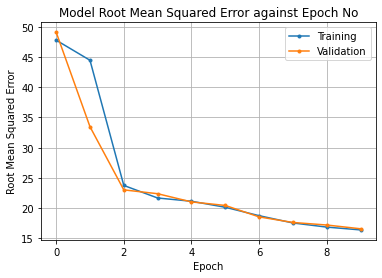

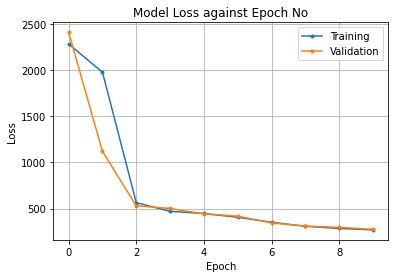

In [4]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution")
netA = exNetClass("netA"); netA.cuda()
netATrain = trainNet(netA, [trainLoader, valLoader], batchsize, epochNo, lr, isCuda=1)